In [635]:
# This Python 3 environment comes with many 
#helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1.데이터 불러오기


주어진 데이터를 불러와 변수할당을 해준 후 확인해준다

In [636]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

#head를 통해 제대로 불러와졌는지 확인한다
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
# 2.특성 선별
현재 주어진 train.csv에서 모든 특성을 이용할것은 아니고 

생존율과 관련이 있을법한 특성을 사용하는게 좋으므로

몇몇 특성만 선별하여 전처리한 후에 그 특성들로 훈련한다

먼저 어떤 특성을 사용할것인지 각각의 특성과 생존율의 관계를 확인한다

텍스트로 보여주기 보다는 직관적인 그림이나 도표를 이용하는것이 편하다

이때 **metaplotlib**의 **seaborn**을 이용할수 있다


In [637]:
import seaborn as sns
import matplotlib.pyplot as plt


원반의 형태인 **pie chart**(파이 차트)를 통해 표현할건데

많은 특성의 생존확율을 알아야 하기 때문에 함수로 만들면 편할것이다


In [638]:
def chart(f):
    f_counts=train[f].value_counts(sort=False) 
    #f_counts는 value_counts()를 통해 얻어진 각 값의 빈도수이다
    f_size=f_counts.size #각 값의 종류가 몇가지인지 알려준다
    f_index=f_counts.index # 값의 범위에 대해 알려준다
    survived=train[train['Survived']==1][f].value_counts() 
    #만약 생존한 경우 train의 Survived 특성은 1이다. 따라서 Survived에서 1인 특성의 갯수를 확인하면
    #해당 특성의 생존자 수를 알수 있다
    dead=train[train['Survived']==0][f].value_counts()
    #반대로 사망자는 Survived특성이 0인 경우이다.
    

    plt.pie(f_counts,labels=f_index, autopct='%1.1f%%')
    #f_counts로 각 값의 비율을 나타내고, labels는 값의 이름을 나타내며 
    #autopct=%1.1f%%로 백분율을 소수 한잘 까지 나타내게 해준다
    plt.title(f+' ratio') #그래프의 이름을 표시해준다
    plt.show()#그래프 출력
    #여기까지는 특성 전체의 비율이 얼마나 되는지 보여준다
    
    for i, index in enumerate(f_index):  
        #반복문을 통해 값들을 종류를 enumerate로 반복한다
        #값들을 각각 받아와서 특성이 해당  값일때 의 생존비율을 확인하는 것이다
        plt.subplot(1,f_size+1,i+1, aspect='equal')
        #원래 그래프보다 크기가 작은 보조 그래프인 서브 플롯을 생성한다 
        plt.pie([survived[index],dead[index]],labels=['survived','died'])
        #파이 차트를 통해 표현하는데 해당 값에서의 생존 비율을 나타낸다
        plt.title(str(index)+' ratio')
        #해당 값의 이름을 띄워준다

이제 함수를 만들었으니 특성들을 살펴보고 어떤 특성이 적합한지 찾을 수 있다

값에 따라 생존자 격차가 심할수록 그 특성이 적합하다고 볼 수 있다


먼저 성별을 살펴본다

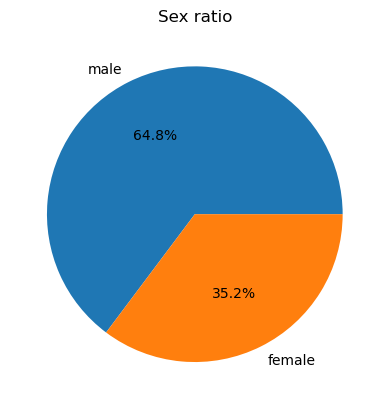

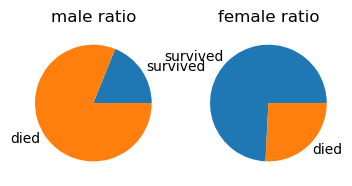

In [639]:
chart('Sex')

성별은 남성과 여성의 차이가 뚜렷히 나타난다

* 남성의 전체 비율이 약간 높음에도 불구하고 생존 비율은 여성이 훨씬 더 높다

사용하기 적절한 특성이라고 볼 수 있다


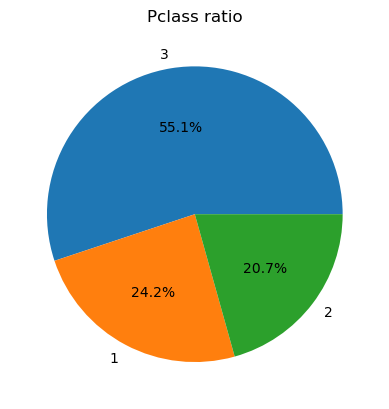

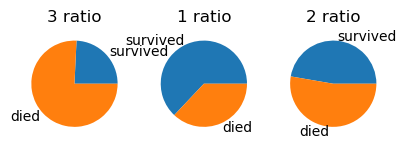

In [640]:
chart('Pclass')

다음으로 살펴본 계층 역시 값 별로 꽤 많은 차이가 난다

계층의 경우 1이 상위 계층, 2가 중간 계층, 3이 하위 계층이다

* 하위 계층의 비율이 높음에도 불구하고 사망자 비율이 가장 높으며

* 상위 계층은 두번째로 비율이 높은데도 사망자 비율이 가장 낮으며

* 중간 계층은 가장 수는 적지만 사망 비율은 2번째였다

계층 등급에 따라 격차가 심하므로 이 특성도 사용할만 한 특성이다

나이는 같은 경우에는 값이 너무 다양하기 떄문에 바로 이 함수로는 사용하기 어려우며

이름으로 생존율을 구하기는 어렵기 때문에 무시한다

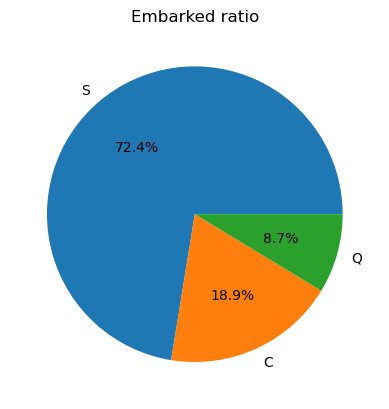

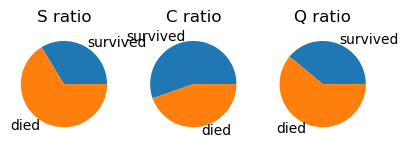

In [641]:
chart('Embarked')

승선한 지역에 따라서 확인하는것도 가능 하다

S는 사우스햄튼 C는 셰르부르 Q는 퀸즈타운이다

셰르부르의 경우 유독 생존자가 높다


나머지 특성 역시 이 함수를 통해 확인하기에는 값의 종류가 다양하다

따라서 이번에는 파이차트가 아닌 **Bar Chart** (바 차트)를 이용해본다

파이차트와 마찬가지로 바 차트 역시 함수로 정의하면 편하다

In [642]:
def chart2(f):
    survived=train[train['Survived']==1][f].value_counts()
    died=train[train['Survived']==0][f].value_counts()
    #해당 특성에 따른 생존과 사망자 수를 먼저 지정해준다
    df=pd.DataFrame([survived, died])
    #그리고 판다스 데이터 프레임으로 사망자, 생존자를 저장한다음
    df.index=['Survived','Died']
    #인덱스를 바꿔준다
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    #그리고 plot을 통해 그래프를 만드는데
    #kind를 통해 바로 설정하고 stacked로 쌓인 형태가 되게 하며 figsize로 크기를정해준다    
    

바차트를 정의 했으니 이번에는 아까 확인하기 어려웠던 다른 특성들도 확인해본다

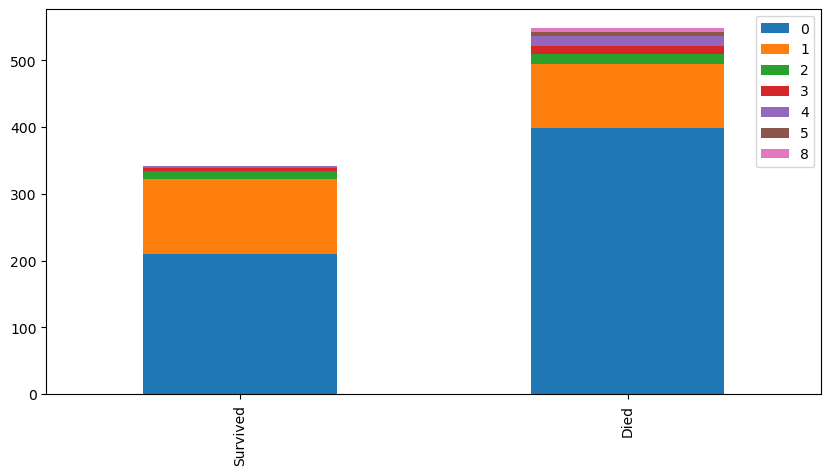

In [643]:
chart2('SibSp')

SibSp는 형제나 배우자와 함께 탄 경우인데 혼자 탄 경우 더 많이 죽었으며

***2명이상 같이 탄 경우***에는 생존율이 올라간다

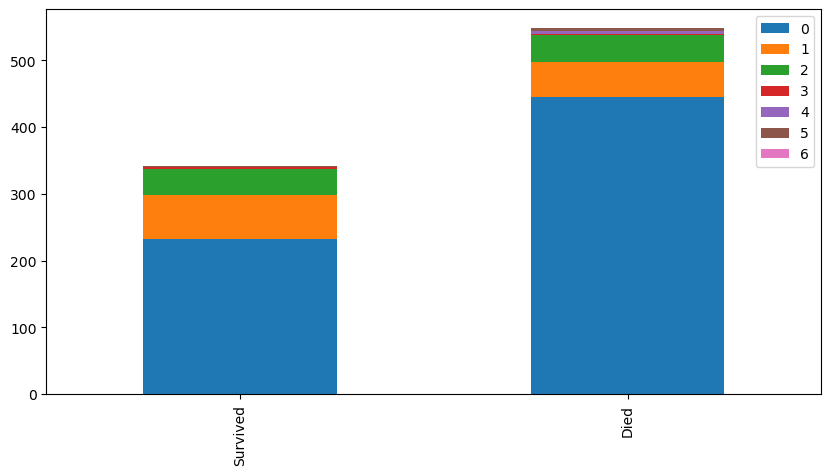

In [644]:
chart2('Parch')

역시 자식이나 부모가 ***없는 경우*** 사망자의 비율이 올라간다

앞서 확인 한 결과를 정리하면

* 여성인 경우 남성보다 생존 확률이 높았다
* 높은 계층이 하위 계층보다 생존 확률이 높았다
* 셰르부르에 탑승한 승객이 생존 확률이 높았다
* 혼자 탄 경우 2명이상의 동승객과 탄 경우보다 사망 확률이 높았다

정도로 요약이 가능하다

-------------------------------------------------------------------------------------

다만 이정도의 특성만 사용하기에는 정확도가 높게 나올것 같지가 않다

따라서 다른 특성들을 사용하거나 어느정도 수정해서 더 정확한 값이 나오도록 유도해야한다




아직 나이에 대해서는 사용하지 않았는데 나이도 적절하게 처리하면 이용할수 있을것이다

일단 노약자의 경우 다른 연령대의 사람에 비해 생존확율이 높을수도 있다

따라서 각각의 나이를 아동-청년/중년-노년으로 분류 한 후에 다시 **파이 차트**로 확인해볼수 있다




일단 각 나이에 맞게 조건을 지정해준다

1910년대 영국 평균 수명이 52세이기 떄문에 노년의 기준을 50세로 잡아준다

그리고 loc를 이용해 조건에 맞는 값들을 각각 1, 2, 3으로 바꿔준다

In [645]:
import copy
train_bak = pd.read_csv('/kaggle/input/titanic/train.csv')
train=copy.deepcopy(train_bak)

train.loc[train['Age']<=15,'Age']=1
train.loc[(train['Age']>15) &(train['Age']<=50),'Age']=2
train.loc[train['Age']>50,'Age']=3

In [646]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,2.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,2.0,0,0,111369,30.0000,C148,C


1,2,3 으로 처리했으니 미리 만들어둔 파이 차트함수인 chart()를 이용해서 확인해보자

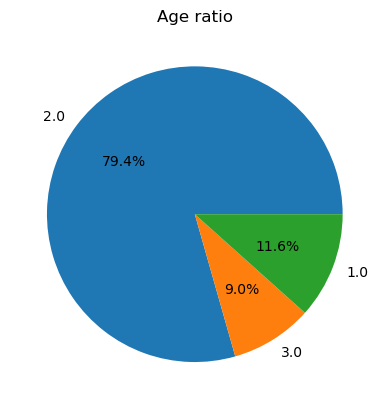

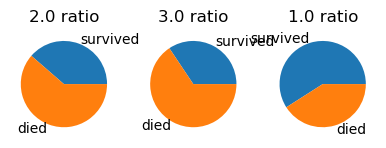

In [647]:
chart('Age')

확실히 어린이의 경우가 더 생존율이 높았다는것을 확인 할수 있다

좀더 세분화 할수도 있을것 같다

이번에는 더 많이 나누어서 어느정도의 데이터를 사용하면 좋을지 확인해본다


In [648]:
train = copy.deepcopy(train_bak)

train.loc[train['Age']<=10,'Age']=1
train.loc[(train['Age']>10) &(train['Age']<=20),'Age']=2
train.loc[(train['Age']>20) &(train['Age']<=35),'Age']=3
train.loc[(train['Age']>35) &(train['Age']<=50),'Age']=4
train.loc[train['Age']>50,'Age']=5



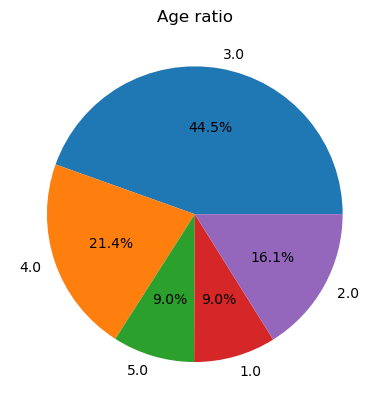

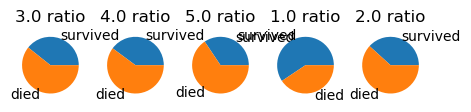

In [649]:
chart('Age')

다른 연령계층의 경우 큰 차이가 없고 오로지 10살 이하의 아동만 더 높은 생존률을 보였으며

나머지 연령은 큰 차이를 보이지 않으므로

아예 어린아이와 나머지계층으로 나누는것도 나쁘지 않을것 같다


In [650]:
train = copy.deepcopy(train_bak)

train.loc[train['Age']<=10,'Age']=1
train.loc[train['Age']>10,'Age']=2


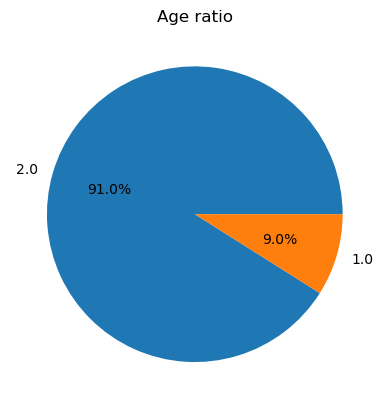

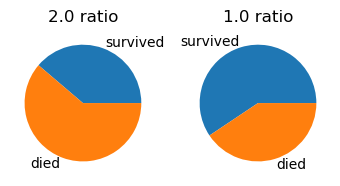

In [651]:
chart('Age')

아동을 제외한 나머지 계층을 합친다 할지라도 생존비율은 이전과 큰 차이가 없으므로

이렇게 아동과 나머지로 분할하는게 더 확실하게 볼수 있는것 같다

-------------------------------------------------------------------------------------

다음으로 운임도 이런식으로 어느정도 계층을 나누면 좋을것 같다

In [652]:
train['Fare'].value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

운임은 0~512까지로 지정되었는데

3분위수를 이용하면 좋을것 같다

In [653]:
q1=train['Fare'].quantile(.25)
q2=train['Fare'].quantile(.50)
q3=train['Fare'].quantile(.75)

print("25%:",q1)
print("50%:",q2)
print("75%:",q3)

25%: 7.9104
50%: 14.4542
75%: 31.0


이제 나이와 마찬가지로 loc을 이용해 각각 1, 2, 3, 4로 변경해준다

In [654]:

train.loc[train['Fare']<=q1,'Fare']=1
train.loc[(train['Fare']>q1) &(train['Fare']<=q2),'Fare']=2
train.loc[(train['Fare']>q2) &(train['Fare']<=q3),'Fare']=3
train.loc[train['Fare']>q3,'Fare']=4

In [655]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,1.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,4.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,2.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,4.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,2.0,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,2.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,2.0,0,0,112053,3.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.0,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,2.0,0,0,111369,3.0,C148,C


이제 chart로 다시 확인해본다

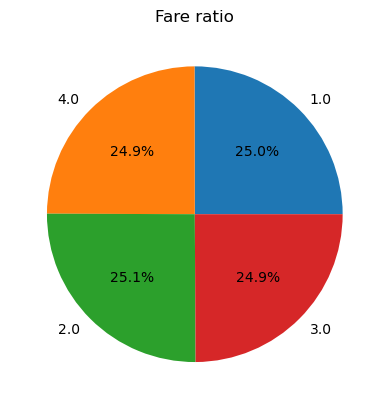

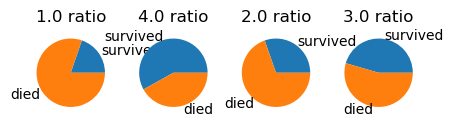

In [656]:
chart('Fare')

3분위로 정확히 4분할했기 때문에 비율은 일정하다

그런데 이때 생존 비율은 어느정도 차이가 나는것을 볼 수 있다

***운임 비용이 높을 수록*** 생존할 확률이 증가 한것이다

앞서 확인 한 결과와

* 여성인 경우 남성보다 생존 확률이 높았다
* 높은 계층이 하위 계층보다 생존 확률이 높았다
* 셰르부르에 탑승한 승객이 생존 확률이 높았다
* 혼자 탄 경우 2명이상의 동승객과 탄 경우보다 사망 확률이 높았다

추가로 2가지 결과를 더 얻어냈다
* 어린 아이의 생존 확률이 더 높았으며 그 위의 나잇대는 연령에 따른 별다른 차이가 보이지 않는다
* 운임 비용이 높을 수록 생존 확률이 올라갔다




-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------




# 3. 전처리

이제 어떤 특성을 사용할지 어느정도 찾았으니 이제 전처리를 이용하면 된다



먼저 테스트와 트레인을 한거번에 처리하기 위해 리스트로 합친다



In [657]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train_test=[train, test]

사용하고 싶은 특성들은 **성별, 선착장, 나이, 운임, 계층**이다

-------------------------------------------------------------------------------------

먼저 성별을 전처리 해준다
지금은 obj 데이터타입 이므로 str으로 바꿔준다

In [658]:
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

-------------------------------------------------------------------------------------

다음으로는 선착장을 전처리 해준다

선착장을 살펴보면

In [659]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

결측치가 2개 존재한다

대부분의 사람들은 사우스햄튼에서 탑승했으므로 2명도 그냥 사우스햄튼 탑승으로 해주고

obj를 str로 바꿔준다


In [660]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

-------------------------------------------------------------------------------------

이번에는 나이를 바꿔준다


위에 도표에서 처럼 10살을 기준으로 위아래로 나눠주고

결측치가 꽤 많이 존재하기 때문에 평균으로 넣어야하는데 어차피 10을 기준으로 하면 평균은 10보다 위로 나오기 때문에 그냥 other에 넣어준다


마찬가지로 경향성을 갖지 않게 하기위해 str 형태로 넣어준다



In [661]:
for dataset in train_test:
    dataset['Age'].fillna(1, inplace=True)

In [662]:
for dataset in train_test:
    dataset.loc[dataset['Age']<=10,'Age']=0
    dataset.loc[dataset['Age']>10,'Age']=1

    dataset['Age'] = dataset['Age'].map( { 0: 'child',1:'other'})

-------------------------------------------------------------------------------------

이번에는 Fare인데 test에 결측치가 하나 존재하니 해결한 후에

아까 처럼 3분위수로 나눠 주기 위해 일단 quantile을 통해 3분위수를 구한다

결측치는 3분위수로 얻는 중앙값으로 하면 될것 같다

In [663]:
test.isnull().sum() #결측치 확인

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [664]:
for dataset in train_test:
    q1=dataset['Fare'].quantile(.25)
    q2=dataset['Fare'].quantile(.5)
    q3=dataset['Fare'].quantile(.75)
    dataset['Fare'].fillna(q2, inplace=True)
print(q1, q2, q3)

7.8958 14.4542 31.5


마찬가지로 loc을 이용해 분류한다

In [665]:
for dataset in train_test:
    dataset.loc[dataset['Fare']<q1,'Fare']=1
    dataset.loc[(dataset['Fare']>q1) &(dataset['Fare']<=q2), 'Fare']=2
    dataset.loc[(dataset['Fare']>q2) &(dataset['Fare']<=q3), 'Fare']=3
    dataset.loc[dataset['Fare']>q3,'Fare']=4

계층과 Fare는 경향성을 가져도 크게 이상하지 않음으로 전처리 해줄 필요가 없다

-------------------------------------------------------------------------------------

마지막으로 필요없는 특성들을 추출하고 남은 전처리 과정을 거친다

In [666]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)
train=train.drop(['PassengerId'], axis=1)

In [667]:
print(train.head())
print(test.head())

   Survived  Pclass     Sex    Age  Fare Embarked
0         0       3    male  other   1.0        S
1         1       1  female  other   4.0        C
2         1       3  female  other   2.0        S
3         1       1  female  other   4.0        S
4         0       3    male  other   2.0        S
   PassengerId  Pclass     Sex    Age  Fare Embarked
0          892       3    male  other   1.0        Q
1          893       3  female  other   1.0        S
2          894       2    male  other   2.0        Q
3          895       3    male  other   2.0        S
4          896       3  female  other   2.0        S


원하는 것처럼 pclass, sex, age, fare, eambarked만 존재한다

이제 문자열은 원핫 인코딩으로 다시 전처리 하고 train과 label을 분리하면 된다

In [668]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
#더미로 원핫 인코딩을 해준다
train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

# 4.모델 학습 및 결과

결측치와 경향성을 해결했으므로 이제 모델을 학습시키면 된다

예측 모델은 스킷런에서 5가지를 사용할수 있다

1. 로지스틱스
2. SVM
3. K-근접이웃
4. 랜덤 포레스트
5. 나이브 베이즈

In [669]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#각각 해당하는 모델을 불러온다

from sklearn.utils import shuffle #섞어주기
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

어떤게 좋은지는 직접 실험해보면 되는데

그냥 실험하면 번거로우니 함수로 만들어준다

In [670]:
def train_and_test(model):
   model.fit(train_data, train_label)
   prediction = model.predict(test_data)
   accuracy = round(model.score(train_data, train_label) * 100, 2)
   print("Accuracy : ", accuracy, "%")
   return prediction

In [671]:
# 1. 로지스틱스

log_pred = train_and_test(LogisticRegression())
# 2. SVM
svm_pred = train_and_test(SVC())
# 3. K-근접이웃
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# 4. 랜덤 포레스트
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# 5. 나이브 베이즈
nb_pred = train_and_test(GaussianNB())

Accuracy :  78.0 %
Accuracy :  79.8 %
Accuracy :  81.93 %
Accuracy :  83.39 %
Accuracy :  77.89 %


랜덤 포레스트의 결과가 가장 높게 나왔으므로 이걸 이용한다

submission 을 이용해 가장 정확도가 높은것을 csv로 추출한다

In [674]:
rf_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [678]:
pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": rf_pred}).to_csv('submission_rf.csv', index=False)